In [1]:
!pip install dython


In [2]:

!gdown 1y2qkTYf0Mb_DeiOkDc7r78J6DGhxt_7P

Downloading...
From: https://drive.google.com/uc?id=1y2qkTYf0Mb_DeiOkDc7r78J6DGhxt_7P
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 54.1MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import pandas as pd

df = pd.read_csv('BankChurners.csv')

# Display the first few rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#حذف دو ستون اخر طبق توضیحات دیتاست





In [5]:
df = df[df.columns[:-2]]

# کورلیشن



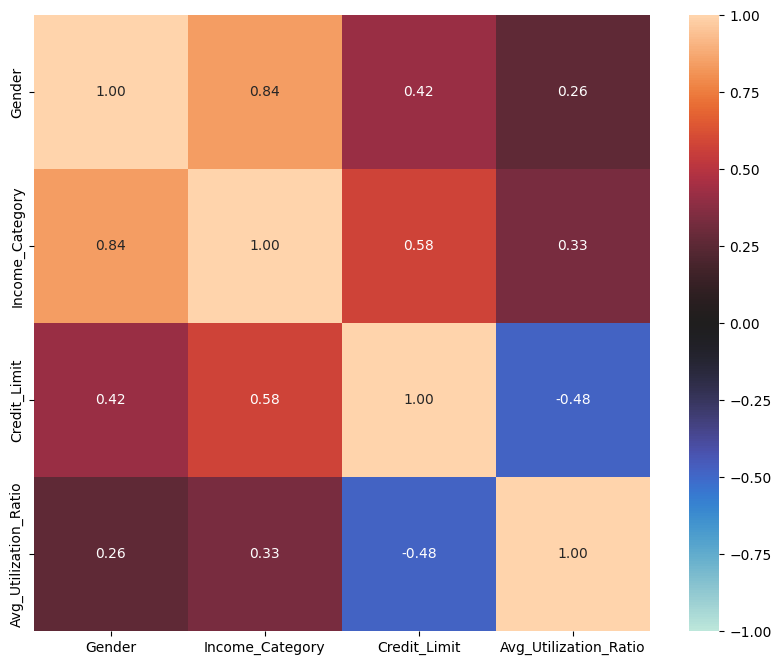

In [6]:
# Install required libraries
# pip install dython

import pandas as pd
import matplotlib.pyplot as plt
from dython.nominal import associations

# داده‌ها را بارگذاری کنید
data = pd.read_csv('BankChurners.csv')

# انتخاب ویژگی‌های مرتبط
selected_columns = ['Gender', 'Income_Category', 'Credit_Limit', 'Avg_Utilization_Ratio']
df_selected = data[selected_columns]

# محاسبه ماتریس همبستگی با Dython
correlation_matrix = associations(
    df_selected,
    nominal_columns=['Gender', 'Income_Category'],  # مشخص کردن ستون‌های کتگوریکال
    numerical_columns=['Credit_Limit', 'Avg_Utilization_Ratio'],  # مشخص کردن ستون‌های عددی
    figsize=(10, 8),
    plot=True
)

# نمایش نمودار
plt.show()


#Converting categorical variables to numerical with frequency encoding

In [7]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# # شناسایی ستون‌های ترتیبی و غیرترتیبی
# ordinal_columns = ['Education_Level', 'Income_Category']  # متغیرهای ترتیبی
# nominal_columns = ['Card_Category', 'Marital_Status']  # متغیرهای نامرتب
# binary_columns = ['Attrition_Flag', 'Gender']  # متغیرهای دودویی

# # حذف داده‌های NaN و مقادیر 'Unknown' در صورت وجود
# df.replace('Unknown', pd.NA, inplace=True)  # جایگزینی Unknown با NaN
# df.dropna(inplace=True)  # حذف تمامی سطرهای دارای NaN

# # 1. کدگذاری متغیرهای دودویی (Binary Encoding)
# label_encoders = {}
# for column in binary_columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le

# # 2. کدگذاری متغیرهای ترتیبی با OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

# # 3. کدگذاری متغیرهای غیرترتیبی با Frequency Encoding
# for column in nominal_columns:
#     frequency = df[column].value_counts(normalize=True)
#     df[column] = df[column].map(frequency)

# # نمایش اطلاعات اولیه دیتافریم اصلاح‌شده
# df.info()
# df.head()

In [8]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# import pandas as pd

# # جداسازی متغیرهای ترتیبی و نامرتب

# nominal_columns = ['Card_Category', 'Marital_Status']  # مثال برای متغیرهای نامرتب

# label_encoders = {}  # برای Gender و Attrition_Flag

# # 1. Encoding 'Attrition_Flag' and 'Gender' (Binary Variables)
# for column in ['Attrition_Flag', 'Gender','Education_Level', 'Income_Category']:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le


# # 3. Encoding nominal columns (Card_Category, Marital_Status) with One-Hot Encoding
# df = pd.get_dummies(df, columns=nominal_columns, drop_first=False)
# false = 0

# # نمایش چند سطر اول دیتافریم
# df.head()

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pandas as pd

# جداسازی متغیرهای ترتیبی و نامرتب
ordinal_columns = ['Education_Level', 'Income_Category']  # مثال برای متغیرهای ترتیبی
nominal_columns = ['Card_Category', 'Marital_Status']  # مثال برای متغیرهای نامرتب

label_encoders = {}  # برای Gender و Attrition_Flag
ordinal_encoders = {}  # برای متغیرهای ترتیبی
# 1. Encoding 'Attrition_Flag' and 'Gender' (Binary Variables)
for column in ['Attrition_Flag', 'Gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 2. Encoding ordinal columns (Education_Level, Income_Category)
ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
ordinal_encoders = ordinal_encoder

# 3. Encoding nominal columns (Card_Category, Marital_Status) with One-Hot Encoding
df = pd.get_dummies(df, columns=nominal_columns, drop_first=False)
false = 0

# نمایش چند سطر اول دیتافریم
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,3.0,2.0,39,5,1,...,1.625,0.061,True,False,False,False,False,True,False,False
1,818770008,1,49,0,5,2.0,4.0,44,6,1,...,3.714,0.105,True,False,False,False,False,False,True,False
2,713982108,1,51,1,3,2.0,3.0,36,4,1,...,2.333,0.000,True,False,False,False,False,True,False,False
3,769911858,1,40,0,4,3.0,4.0,34,3,4,...,2.333,0.760,True,False,False,False,False,False,False,True
4,709106358,1,40,1,3,5.0,2.0,21,5,1,...,2.500,0.000,True,False,False,False,False,True,False,False


#correlation between two categorical an two continues with target

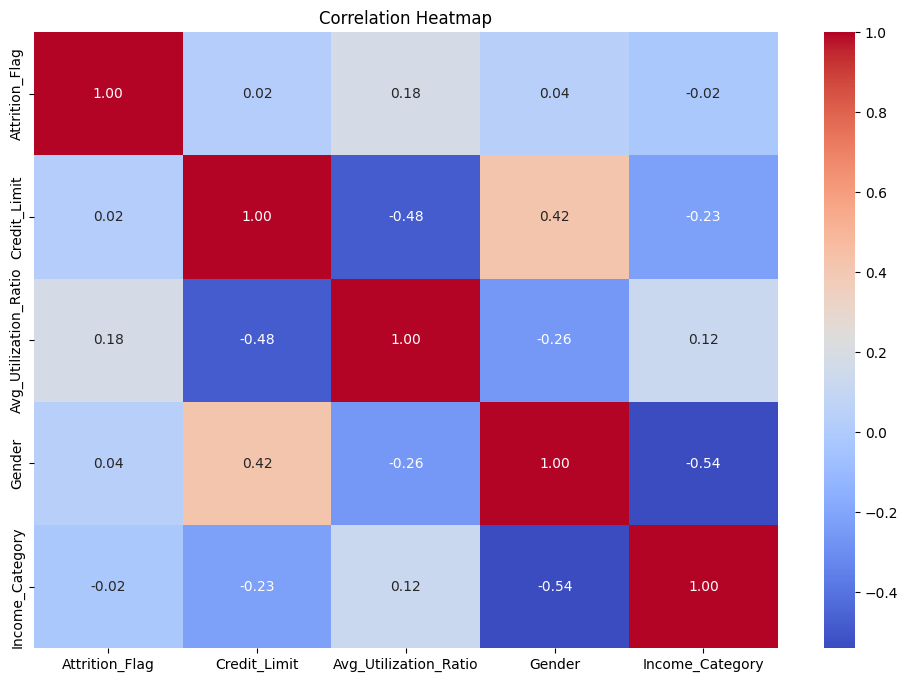

In [10]:
#a heatmap correlation code for card_category and marial status and customer_age and credit limit and attrition flag

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Attrition_Flag' is your target variable
# and you have one-hot encoded 'Card_Category' and 'Marital_Status'

# Select relevant columns for the heatmap
heatmap_cols = ['Attrition_Flag',  'Credit_Limit', 'Avg_Utilization_Ratio'] + \
               [col for col in df.columns if 'Gender' in col or 'Income_Category' in col]

# Calculate the correlation matrix
correlation_matrix = df[heatmap_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#pairplot of 5 features

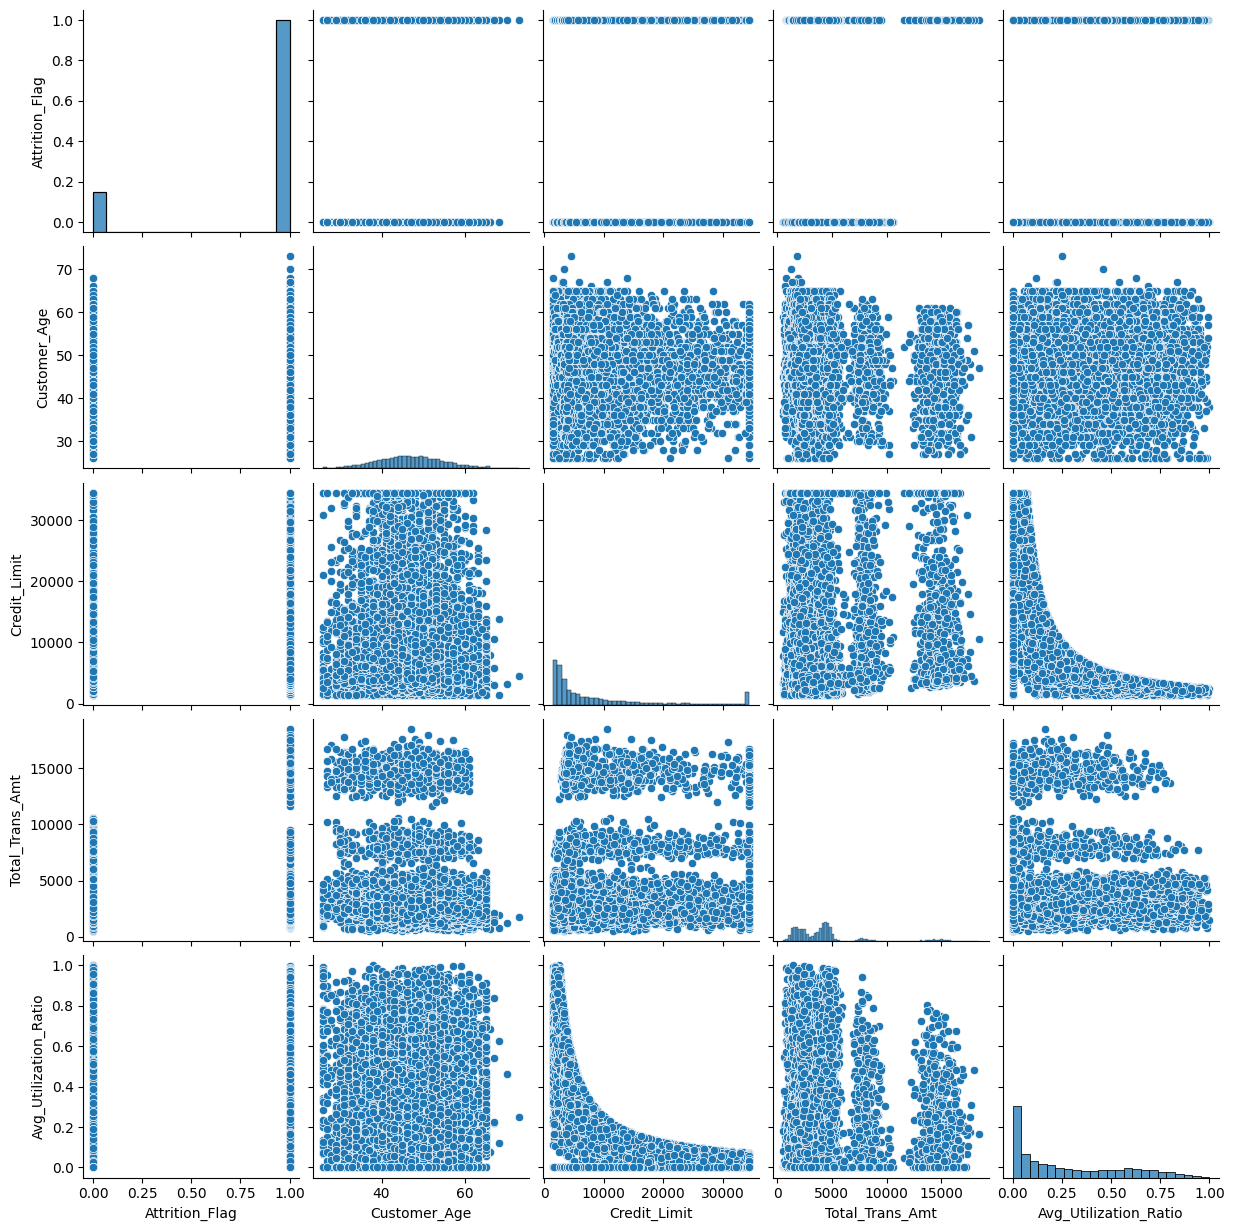

In [11]:
# Including 'Attrition_Flag' in the important features
important_features_with_target = ['Attrition_Flag', 'Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Creating a new dataframe with the selected important features
selected_features_with_target_df = df[important_features_with_target]

# Creating a pairplot for the selected important features including the target
sns.pairplot(selected_features_with_target_df)
plt.savefig('pairplot_with_target.png')
plt.show()

# Saving the plot as an image file
plt.close()

#PCA : کاهش بعد سیستم شبکه

از آنجایی که از وان هات برای عددی کردن بعضی دسته ها زیاد شد پس با این روش کمی پیچیدگی سیستم را کاهش میدهیم

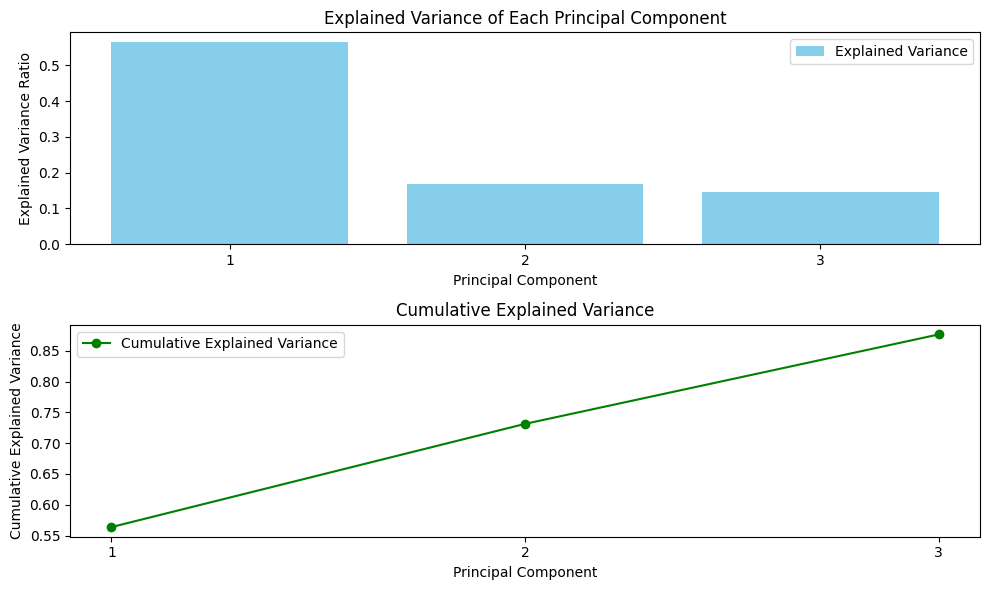

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# فرض می‌کنیم داده‌ها قبلاً به df بارگذاری شده‌اند

# 1. حذف مقادیر 'Unknown' و NaN
df.replace('Unknown', pd.NA, inplace=True)  # جایگزینی Unknown با NaN
df.dropna(inplace=True)  # حذف تمامی سطرهای دارای NaN

# 2. فرض می‌کنیم داده‌های categorical قبلاً One-Hot شده‌اند.
# اینجا باید ستون‌هایی که قبلاً One-Hot شدند را انتخاب کنید.
# اگر ستون‌های One-Hot شده شما در df باشند، می‌توانید به این صورت آنها را انتخاب کنید.
ohe_data = df[['Card_Category_Blue',	'Card_Category_Gold',	'Card_Category_Platinum',	'Card_Category_Silver',	'Marital_Status_Divorced',	'Marital_Status_Married',	'Marital_Status_Single',	'Marital_Status_Unknown']]  # این باید بر اساس نام‌های ستون‌های One-Hot شده شما تغییر کند

# 3. اعمال PCA
N_COMPONENTS = 3  # تعداد مولفه‌های اصلی که می‌خواهیم استخراج کنیم
pca_model = PCA(n_components=N_COMPONENTS)

# اعمال PCA
pc_matrix = pca_model.fit_transform(ohe_data)

# محاسبه واریانس توضیح داده‌شده
evr = pca_model.explained_variance_ratio_

# محاسبه مجموع واریانس توضیح داده‌شده
total_var = evr.sum() * 100

# محاسبه تجمعی واریانس توضیح داده‌شده
cumsum_evr = np.cumsum(evr)

# رسم نمودار
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# نمودار واریانس توضیح داده‌شده برای هر مولفه
bars1 = axs[0].bar(range(1, N_COMPONENTS + 1), evr, color='skyblue', label="Explained Variance")
axs[0].set_title('Explained Variance of Each Principal Component')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].set_xticks(range(1, N_COMPONENTS + 1))
axs[0].legend()

# نمودار تجمعی واریانس توضیح داده‌شده
axs[1].plot(range(1, N_COMPONENTS + 1), cumsum_evr, marker='o', color='green', label="Cumulative Explained Variance")
axs[1].set_title('Cumulative Explained Variance')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Cumulative Explained Variance')
axs[1].set_xticks(range(1, N_COMPONENTS + 1))
axs[1].legend()


plt.tight_layout()
plt.show()

#Enhancing Dataset with Principal Components

In [13]:
df_with_pcs = pd.concat([df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

#Visualizing Principal Components with Credit Limit


<ipython-input-14-402eb4c18011>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_data.loc[:, 'Credit_Limit'] = df_with_pcs['Credit_Limit']


<Figure size 2000x1800 with 0 Axes>

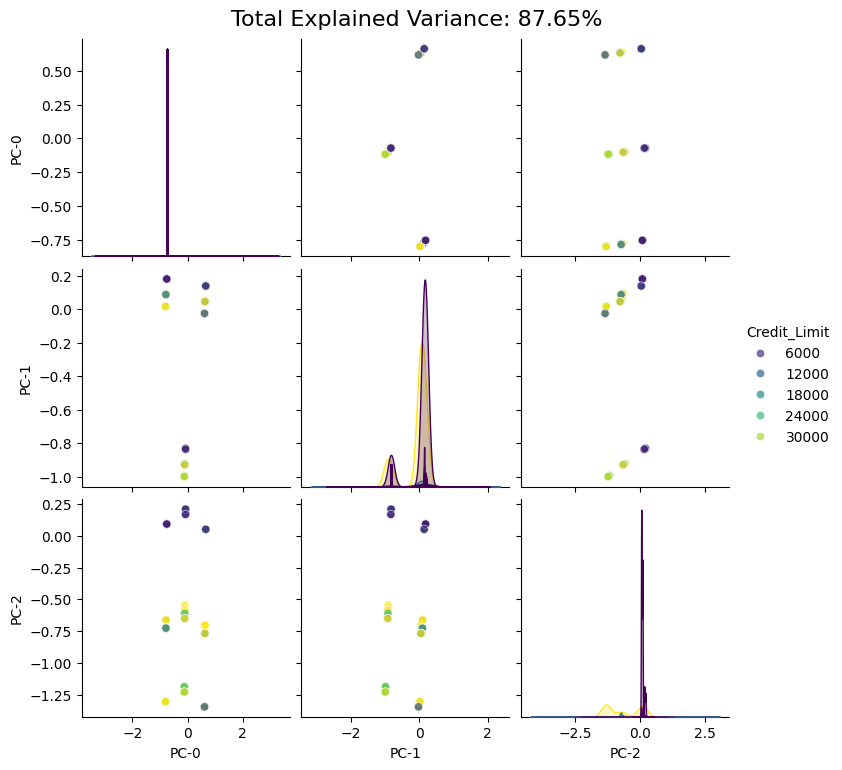

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# فرض می‌کنیم df_with_pcs قبلاً بارگذاری شده است
# اگر داده‌ها از PCA به دست آمده باشند
N_COMPONENTS = 3  # تعداد مولفه‌های اصلی که می‌خواهیم در ماتریس پراکندگی نمایش دهیم

# انتخاب داده‌های مورد نظر (مولفه‌های اصلی)
pc_columns = ['PC-{}'.format(i) for i in range(N_COMPONENTS)]
pc_data = df_with_pcs[pc_columns]

# تنظیم اندازه بزرگتر نمودار
plt.figure(figsize=(20, 18))
# اضافه کردن اطلاعات Credit_Limit برای رنگ‌گذاری
pc_data.loc[:, 'Credit_Limit'] = df_with_pcs['Credit_Limit']

# رسم ماتریس پراکندگی با seaborn
sns.pairplot(pc_data, hue='Credit_Limit', palette='viridis', plot_kws={'alpha':0.7})
plt.suptitle(f'Total Explained Variance: {total_var:.2f}%', fontsize=16, y=1.02)
plt.show()

#Calculating and Visualizing Correlations


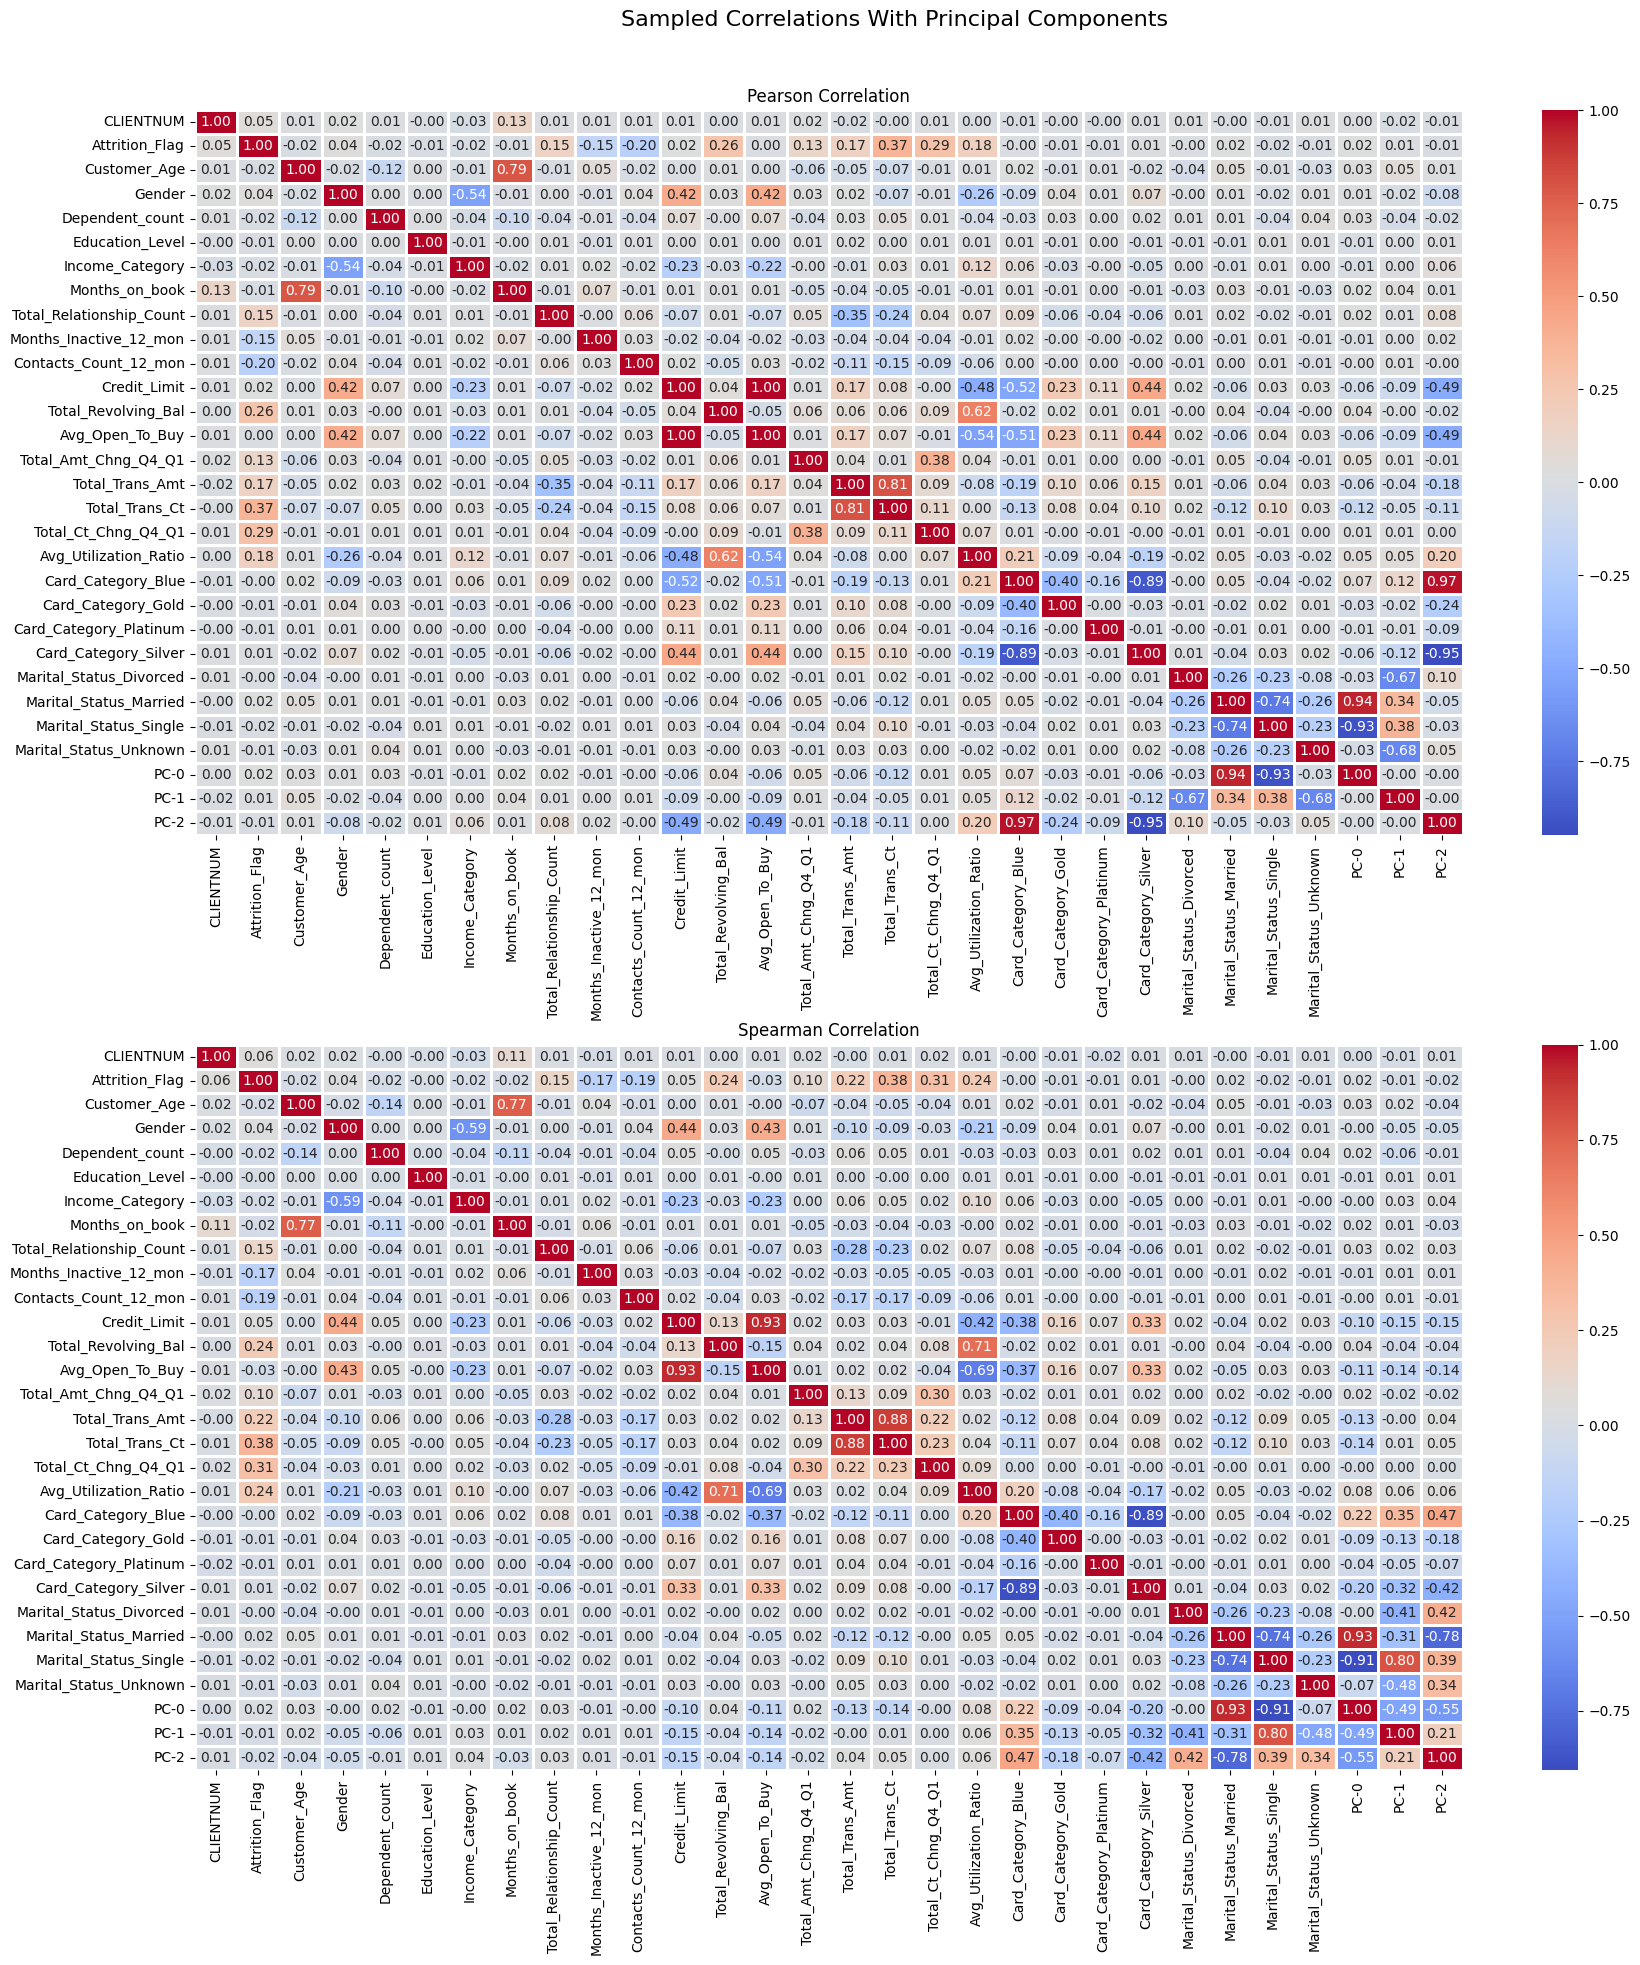

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه همبستگی‌ها
pearson_corr = df_with_pcs.corr('pearson')
spearman_corr = df_with_pcs.corr('spearman')

# ایجاد یک شکل با دو subplot
fig, ax = plt.subplots(2, 1, figsize=(18, 20))

# رسم Heatmap برای همبستگی Pearson
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[0], linewidths=1)
ax[0].set_title('Pearson Correlation')

# رسم Heatmap برای همبستگی Spearman
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax[1], linewidths=1)
ax[1].set_title('Spearman Correlation')

# تنظیمات نمایش نمودار
plt.tight_layout()
plt.suptitle("Sampled Correlations With Principal Components", fontsize=16)
plt.subplots_adjust(top=0.93)  # تنظیم فاصله از بالای صفحه
plt.show()

#Data Cleaning: Handling Missing and 'Unknown' Values

In [16]:
import pandas as pd

# شمارش مقادیر NaN و Unknown پیش از حذف
nan_count = df.isna().sum().sum()  # تعداد کل NaN ها
unknown_count = (df == 'Unknown').sum().sum()  # تعداد کل Unknown ها

print(f"Initial NaN count: {nan_count}")
print(f"Initial 'Unknown' count: {unknown_count}")

# حذف داده‌های NaN و Unknown
df.replace('Unknown', pd.NA, inplace=True)  # جایگزینی Unknown با NaN
df.dropna(inplace=True)  # حذف سطرهایی که حاوی NaN هستند

# شمارش مجدد پس از حذف
final_nan_count = df.isna().sum().sum()
final_unknown_count = (df == 'Unknown').sum().sum()

print(f"Remaining NaN count after cleanup: {final_nan_count}")
print(f"Remaining 'Unknown' count after cleanup: {final_unknown_count}")


Initial NaN count: 0
Initial 'Unknown' count: 0
Remaining NaN count after cleanup: 0
Remaining 'Unknown' count after cleanup: 0


# Checking for class imbalance in the target variable 'Attrition_Flag'

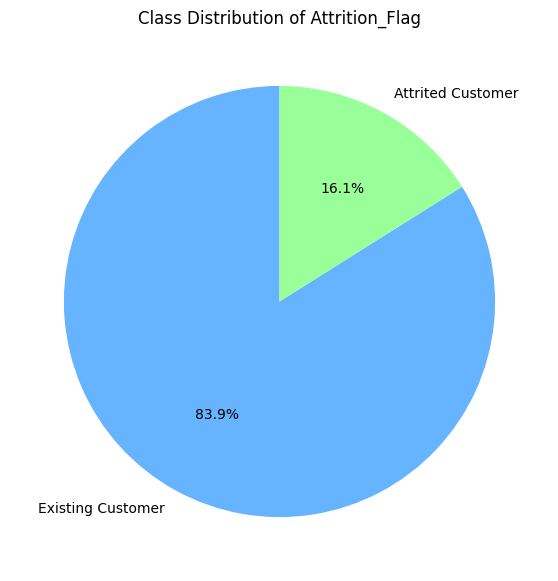

In [17]:
import matplotlib.pyplot as plt

# توزیع کلاس‌ها در ستون 'Attrition_Flag'
class_counts = df['Attrition_Flag'].value_counts()

# نمایش توزیع کلاس‌ها به صورت Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Class Distribution of Attrition_Flag')
plt.show()

# Splitting the data into features and target variable with balancing

In [18]:
from sklearn.model_selection import train_test_split

# فرض کنید df داده‌های شما باشد
X = df.drop(columns=['Attrition_Flag'])  # ویژگی‌ها (تمام ستون‌ها به‌جز هدف)
y = df['Attrition_Flag']  # هدف (ستون Attrition_Flag)

# تقسیم داده‌ها به مجموعه‌های train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43, stratify=y)

# حالا تقسیم داده‌های train به اعتبارسنجی و آموزش
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=43, stratify=y_train)

# بررسی ابعاد مجموعه‌های داده
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (7291, 26)
X_val shape: (1823, 26)
X_test shape: (1013, 26)
y_train shape: (7291,)
y_val shape: (1823,)
y_test shape: (1013,)


#without balancing

In [19]:
# from sklearn.model_selection import train_test_split

# # فرض کنید df داده‌های شما باشد
# X = df.drop(columns=['Attrition_Flag'])  # ویژگی‌ها (تمام ستون‌ها به‌جز هدف)
# y = df['Attrition_Flag']  # هدف (ستون Attrition_Flag)


# # تقسیم داده‌ها به مجموعه‌های train و test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

# # حالا تقسیم داده‌های train به اعتبارسنجی و آموزش
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=43)

# # بررسی ابعاد مجموعه‌های داده
# print(f"X_train shape: {X_train.shape}")
# print(f"X_val shape: {X_val.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_val shape: {y_val.shape}")
# print(f"y_test shape: {y_test.shape}")

# استانداردسازی ویژگی‌ها

In [20]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Building and Compiling the Neural Network Model

In [21]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # تعریف مدل
# model = Sequential()

# # لایه ورودی + لایه مخفی اول (128 نورون، تابع ReLU)
# model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))  # Dropout layer after the first hidden layer

# # لایه مخفی دوم (64 نورون، تابع ReLU)
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))  # Dropout layer after the second hidden layer

# # لایه مخفی سوم (32 نورون، تابع ReLU)
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))  # Dropout layer after the third hidden layer

# # لایه خروجی (1 نورون، تابع Sigmoid برای طبقه‌بندی دودویی)
# model.add(Dense(1, activation='sigmoid'))

# # کامپایل مدل
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # نمایش خلاصه مدل
# model.summary()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# تعریف مدل
model = Sequential()

# لایه ورودی + لایه مخفی اول (128 نورون، تابع ReLU)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# لایه مخفی دوم (64 نورون، تابع ReLU)
model.add(Dense(64, activation='relu'))

# لایه مخفی سوم (32 نورون، تابع ReLU)
model.add(Dense(32, activation='relu'))

# لایه خروجی (1 نورون، تابع Sigmoid برای طبقه‌بندی دودویی)
model.add(Dense(1, activation='sigmoid'))

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# نمایش خلاصه مدل
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

# آموزش مدل با داده‌های اعتبارسنجی

In [23]:

history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8666 - loss: 0.3515 - val_accuracy: 0.9046 - val_loss: 0.2179
Epoch 2/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.1998 - val_accuracy: 0.9172 - val_loss: 0.1976
Epoch 3/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9337 - loss: 0.1700 - val_accuracy: 0.9221 - val_loss: 0.1863
Epoch 4/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9376 - loss: 0.1554 - val_accuracy: 0.9270 - val_loss: 0.1750
Epoch 5/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9449 - loss: 0.1409 - val_accuracy: 0.9325 - val_loss: 0.1704
Epoch 6/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.1294 - val_accuracy: 0.9336 - val_loss: 0.1664
Epoch 7/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1160 - val_accuracy: 0.9353 - val_loss: 0.1706
Epoch 8/40
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1088 - val_accuracy: 0.

#Evaluating Model Performance on Training Data without balancing

In [24]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss}")
print(f"Train Accuracy: {accuracy}")

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.8716e-04
Train Loss: 0.0004669939517043531
Train Accuracy: 1.0


#Evaluating Model Performance on Training Data without balancing

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.3503 
Test Loss: 0.3556850552558899
Test Accuracy: 0.9516288042068481


#Model Evaluation and Performance Visualization

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       163
           1       0.97      0.97      0.97       850

    accuracy                           0.95      1013
   macro avg       0.91      0.90      0.91      1013
weighted avg       0.95      0.95      0.95      1013

Confusion Matrix for Test Set:
[[136  27]
 [ 22 828]]


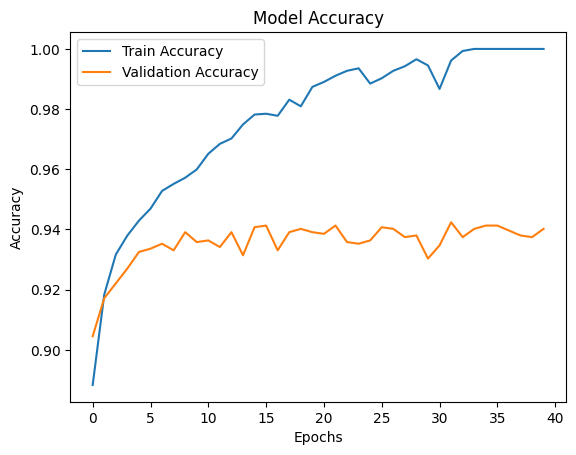

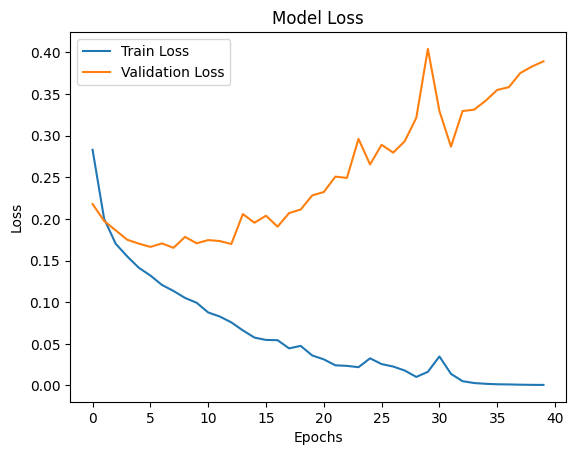

In [26]:
# ارزیابی مدل بر روی مجموعه آزمون
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)  # تبدیل پیش‌بینی به 0 یا 1

# گزارش طبقه‌بندی برای داده‌های آزمون
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# ماتریس درهم‌ریختگی برای داده‌های آزمون
print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))

# رسم نمودارهای دقت و از دست دادن
import matplotlib.pyplot as plt

# دقت در طول دوره‌های آموزشی
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# از دست دادن در طول دوره‌های آموزشی
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model Evaluation and Visualization using Validation and Test Sets without balancing with confusion matrix


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       293
           1       0.97      0.96      0.96      1530

    accuracy                           0.94      1823
   macro avg       0.89      0.89      0.89      1823
weighted avg       0.94      0.94      0.94      1823



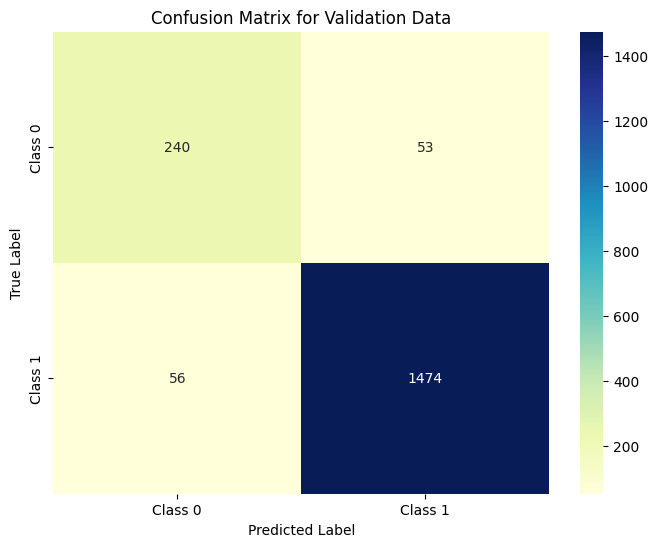

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       163
           1       0.97      0.97      0.97       850

    accuracy                           0.95      1013
   macro avg       0.91      0.90      0.91      1013
weighted avg       0.95      0.95      0.95      1013



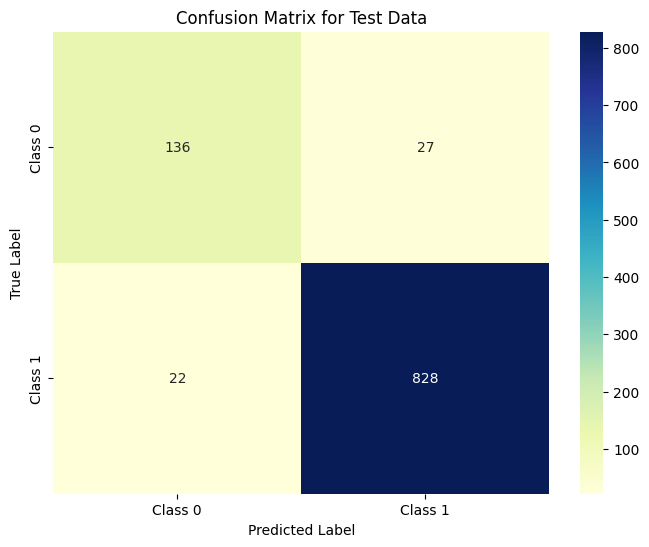

In [27]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# -------------------------------
# پیش‌بینی و تحلیل داده‌های ولیدیشن
# -------------------------------
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)  # تبدیل پیش‌بینی به مقادیر 0 یا 1

# گزارش طبقه‌بندی برای داده‌های ولیدیشن
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# محاسبه ماتریس درهم‌ریختگی برای داده‌های ولیدیشن
cm_val = confusion_matrix(y_val, y_val_pred)

# نمایش ماتریس درهم‌ریختگی برای داده‌های ولیدیشن به صورت هیت‌مپ
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cbar=True)
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# -------------------------------
# پیش‌بینی و تحلیل داده‌های آزمون
# -------------------------------
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)  # تبدیل پیش‌بینی به مقادیر 0 یا 1

# گزارش طبقه‌بندی برای داده‌های آزمون
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# محاسبه ماتریس درهم‌ریختگی برای داده‌های آزمون
cm_test = confusion_matrix(y_test, y_test_pred)

# نمایش ماتریس درهم‌ریختگی برای داده‌های آزمون به صورت هیت‌مپ
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cbar=True)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# bonus


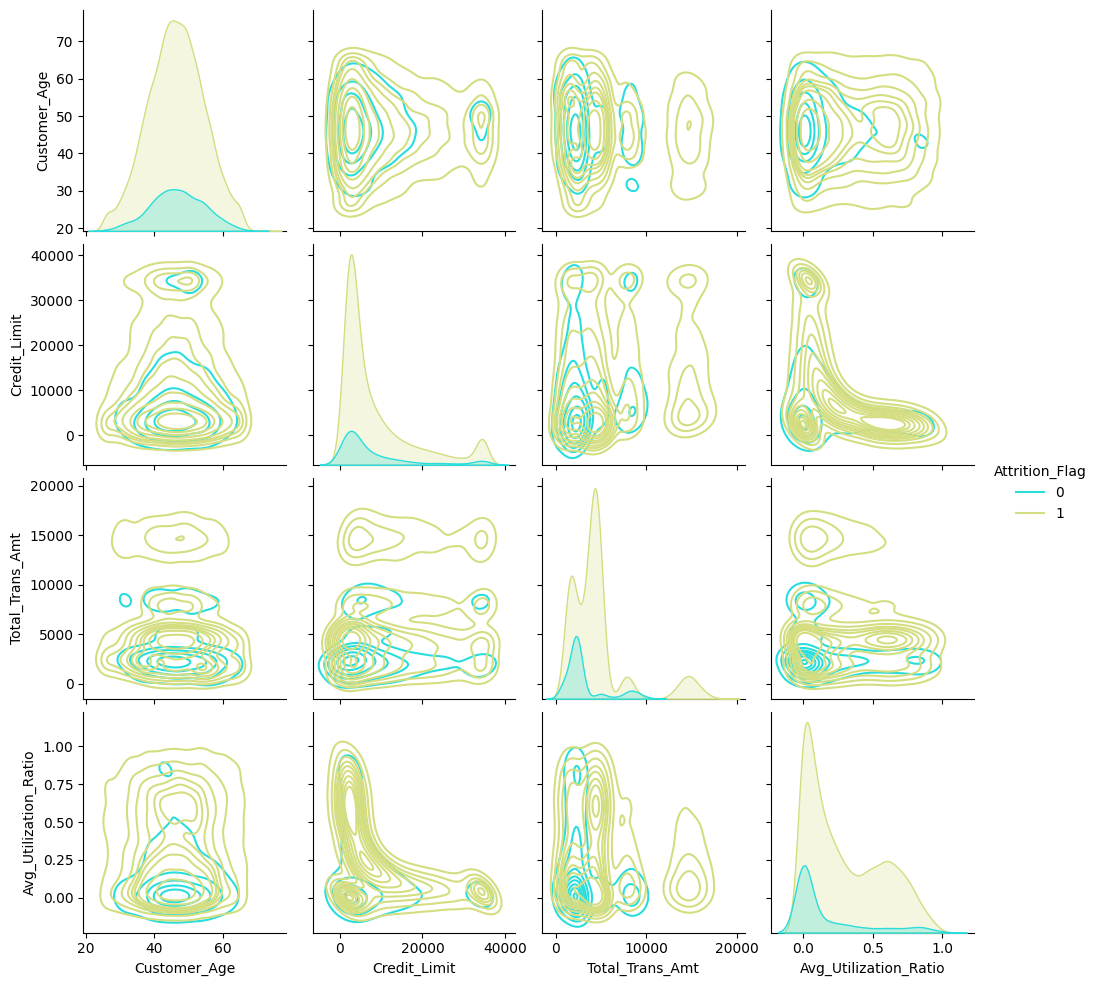

In [28]:
# Including 'Attrition_Flag' in the important features
important_features_with_target = ['Attrition_Flag', 'Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Creating a new dataframe with the selected important features
selected_features_with_target_df = df[important_features_with_target]

# Creating a pairplot for the selected important features including the target
sns.pairplot(selected_features_with_target_df,hue ='Attrition_Flag' , kind='kde', palette='rainbow')
plt.savefig('pairplot_with_target.png')
plt.show()

# Saving the plot as an image file
plt.close()